In [15]:
import numpy as np
import pickle 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [36]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')

In [37]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [38]:
# #check the unique values in the in the classes column
df['Classes']=np.where(df['Classes'].str.contains('not fire'), 0, 1)
df['Classes'].unique()

array([0, 1])

In [39]:
#dependent and independent features
X=df.drop('FWI', axis=1)
Y=df['FWI']

In [40]:
#train test spilit
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42)

In [41]:
X_test.shape,X_train.shape

((61, 14), (182, 14))

In [42]:
#checking corr and droping features on a certian threehold value 
def correlation(dataset, threshold):
    col_corr=set() # Set of all the names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [43]:
#dropping the correlated features
corr_features=correlation(X_train, 0.8)
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

In [44]:
#standerization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)


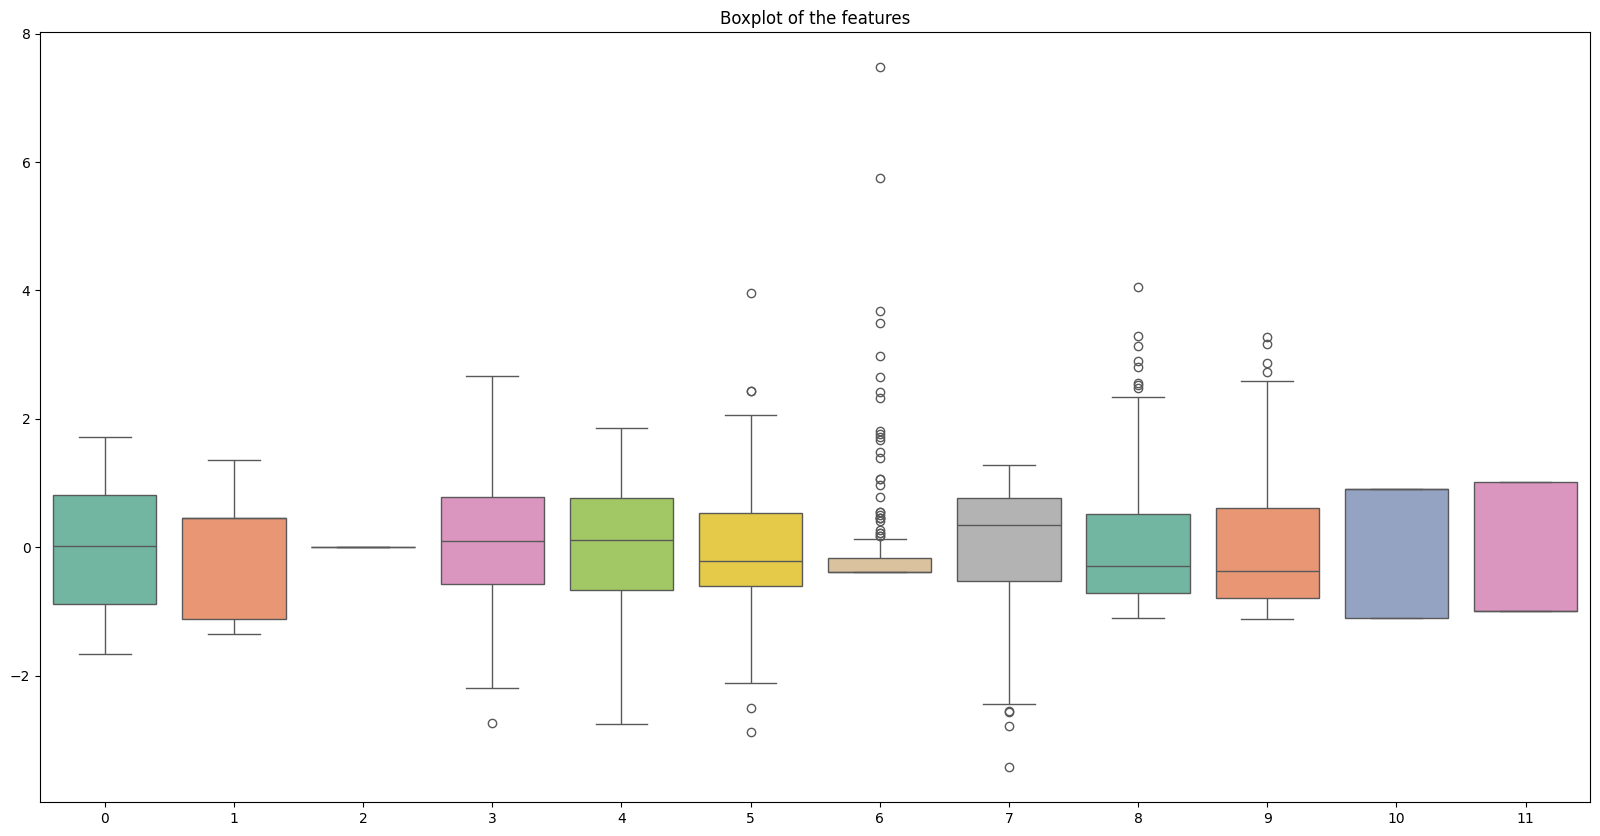

In [45]:
#boxplot
plt.figure(figsize=(20,10))
sns.boxplot(data=X_train_s, orient='vertical', palette='Set2')
plt.title('Boxplot of the features')
plt.show()

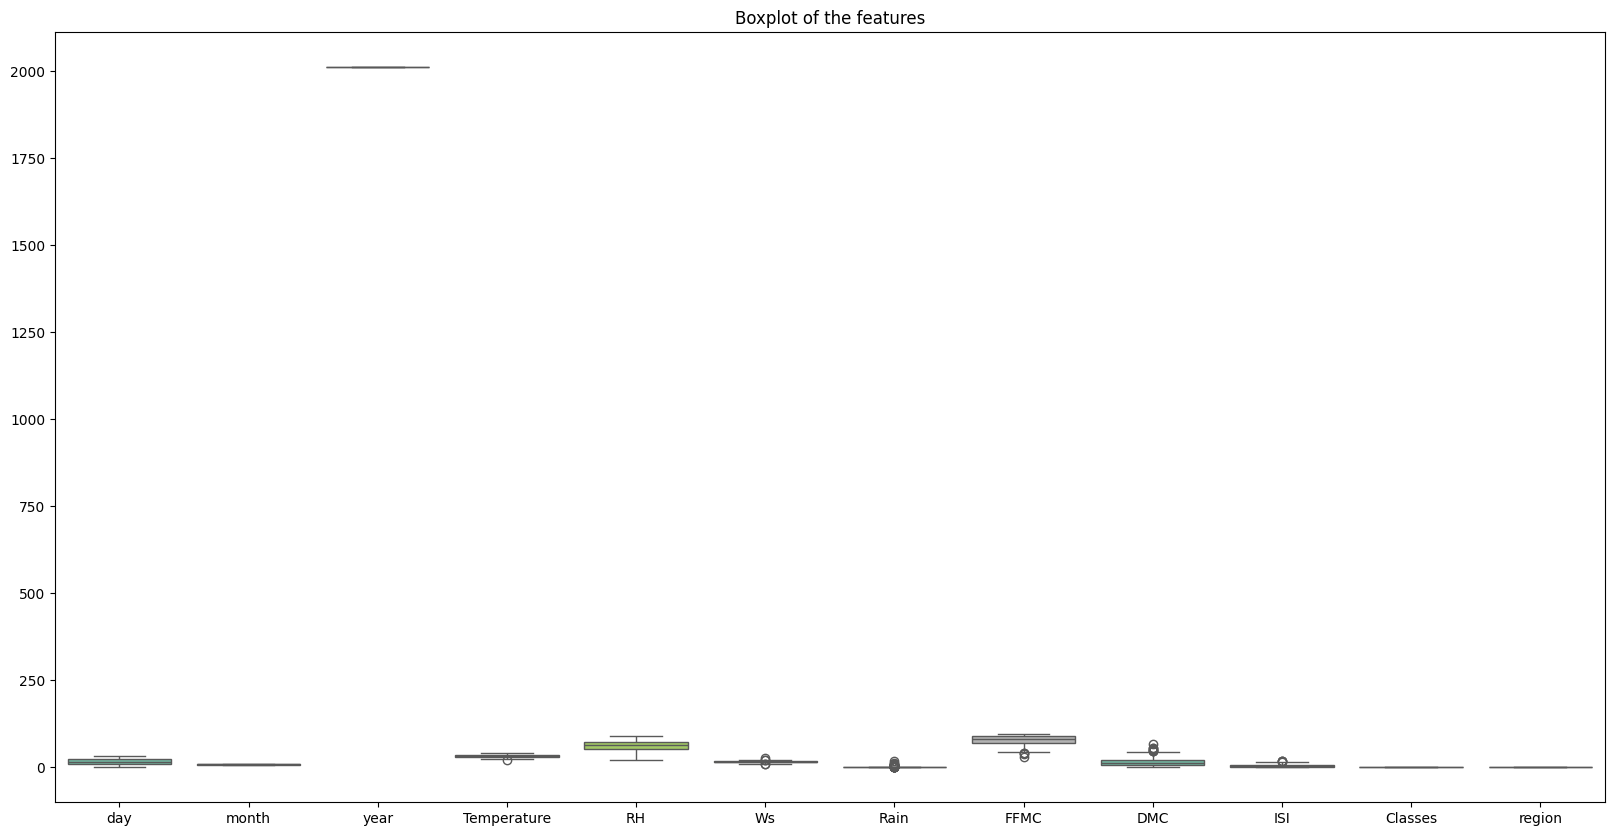

In [46]:
#boxplot
plt.figure(figsize=(20,10))
sns.boxplot(data=X_train, orient='vertical', palette='Set2')
plt.title('Boxplot of the features')
plt.show()

Linear Regresion


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#linear regression
lr=LinearRegression(n_jobs=-1)
lr.fit(X_train_s, Y_train)


LinearRegression(n_jobs=-1)

In [48]:
lr_pred=lr.predict(X_test_s)
#model evaluation
mse=mean_squared_error(Y_test, lr_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test, lr_pred)
print('RMSE:', rmse)
print('R2:', r2)


RMSE: 0.8470622283047425
R2: 0.9837888473078155


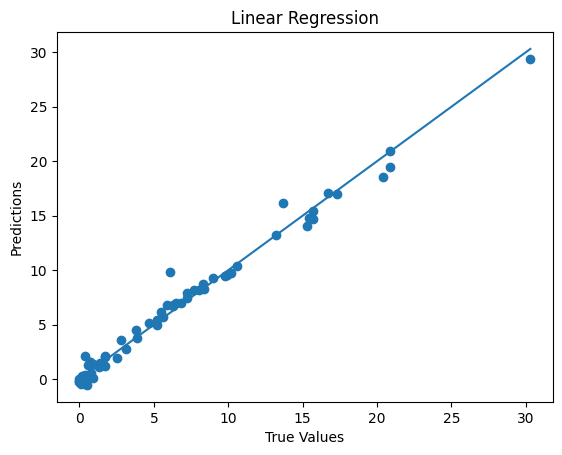

In [49]:
plt.scatter(Y_test, lr_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()])
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')
plt.show()

RMSE: 1.4994485085381748
R2: 0.9492020277152008


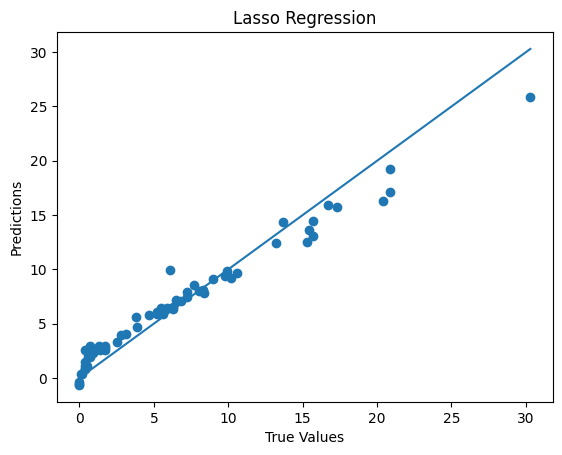

In [50]:
#lasso regression
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_s, Y_train)
lasso_pred=lasso.predict(X_test_s)
#model evaluation
mse=mean_squared_error(Y_test, lasso_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test, lasso_pred)
print('RMSE:', rmse)
print('R2:', r2)
plt.scatter(Y_test, lasso_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()])
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Lasso Regression')
plt.show()


RMSE: 0.8633242819587358
R2: 0.9831604230861805


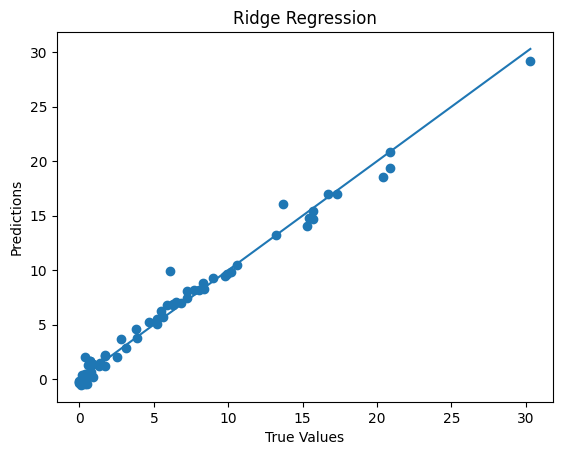

In [51]:
#ridge regression
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_s, Y_train)
ridge_pred=ridge.predict(X_test_s)
#model evaluation
mse=mean_squared_error(Y_test, ridge_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test, ridge_pred)
print('RMSE:', rmse)
print('R2:', r2)
plt.scatter(Y_test, ridge_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()])
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Ridge Regression')
plt.show()

RMSE: 2.3424247934101583
R2: 0.8760305780807829


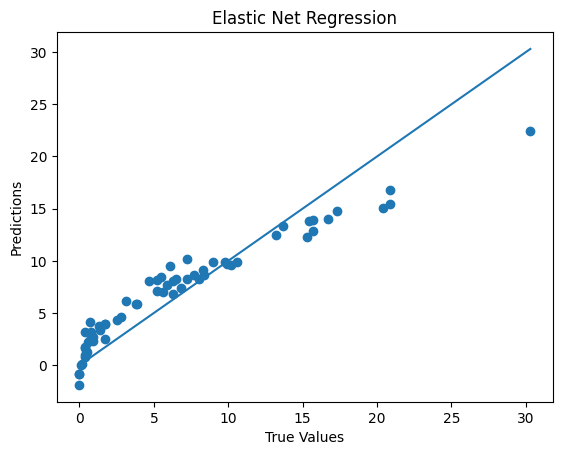

In [52]:
#elastic net regression
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train_s, Y_train)
elastic_pred=elastic.predict(X_test_s)
#model evaluation       
mse=mean_squared_error(Y_test, elastic_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test, elastic_pred)   
print('RMSE:', rmse)
print('R2:', r2)
plt.scatter(Y_test, elastic_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()])
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Elastic Net Regression')
plt.show()

In [53]:
#create a pickle of ridge model
pickle.dump(ridge, open('ridge_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))